In [311]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [312]:
df=pd.read_csv('water-level-heights_16732.csv')

In [313]:
df.head()

,category,Water Level,Water Level Error
0,Fri Dec 07 2018,63.734035,0.006191
1,Thu Jan 03 2019,63.144704,0.013885
2,Wed Jan 30 2019,63.216898,0.028472
3,Tue Feb 26 2019,63.529581,0.012046
4,Mon Mar 25 2019,62.927461,0.029593


In [314]:
df.shape

(72, 3)

In [315]:
df.tail()

,category,Water Level,Water Level Error
67,Mon Nov 20 2023,64.493953,0.029252
68,Sun Dec 17 2023,64.126630,0.004439
69,Sat Jan 13 2024,63.706348,0.038557
70,Fri Feb 09 2024,63.669447,0.060157
71,Thu Mar 07 2024,63.595100,0.023479


In [316]:
df.drop(columns=['Water Level Error'], inplace=True)


In [317]:
df.rename(columns={'category': 'Month'}, inplace=True)

In [318]:
df.columns=["Month","Water Level"]
df.head()

,Month,Water Level
0,Fri Dec 07 2018,63.734035
1,Thu Jan 03 2019,63.144704
2,Wed Jan 30 2019,63.216898
3,Tue Feb 26 2019,63.529581
4,Mon Mar 25 2019,62.927461


In [319]:
df.tail()

,Month,Water Level
67,Mon Nov 20 2023,64.493953
68,Sun Dec 17 2023,64.126630
69,Sat Jan 13 2024,63.706348
70,Fri Feb 09 2024,63.669447
71,Thu Mar 07 2024,63.595100


In [320]:
df['Month']=pd.to_datetime(df['Month'])


In [321]:

df.head()

,Month,Water Level
0,2018-12-07,63.734035
1,2019-01-03,63.144704
2,2019-01-30,63.216898
3,2019-02-26,63.529581
4,2019-03-25,62.927461


In [322]:
df.set_index('Month',inplace=True)

In [323]:
df.head()

,Water Level
Month,
2018-12-07,63.734035
2019-01-03,63.144704
2019-01-30,63.216898
2019-02-26,63.529581
2019-03-25,62.927461


In [324]:
df.describe()

,Water Level
count,72.000000
mean,65.226635
std,2.821494
min,62.364610
25%,63.434482
50%,64.063722
75%,66.275769
max,74.373861


<Axes: xlabel='Month'>

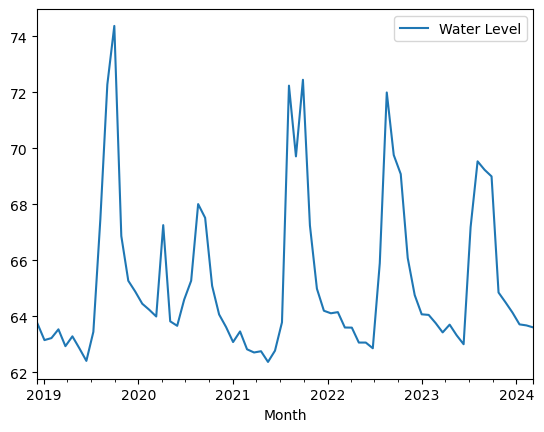

In [325]:
df.plot()

In [326]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [327]:
test_result=adfuller(df['Water Level'])

In [328]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [331]:
adfuller_test(df['Water Level'])

ADF Test Statistic : -2.17306001281593
p-value : 0.2161679794466047
#Lags Used : 11
Number of Observations Used : 60
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [332]:
#Differencing 

In [333]:
df.head()

,Water Level
Month,
2018-12-07,63.734035
2019-01-03,63.144704
2019-01-30,63.216898
2019-02-26,63.529581
2019-03-25,62.927461


In [204]:
df['Water Level First Difference'] = df['Water Level'] - df['Water Level'].shift(1)

In [205]:
df['Water Level'].shift(1)

Month
2018-12-07          NaN
2019-01-03    63.734035
2019-01-30    63.144704
2019-02-26    63.216898
2019-03-25    63.529581
                ...    
2023-11-20    64.845229
2023-12-17    64.493953
2024-01-13    64.126630
2024-02-09    63.706348
2024-03-07    63.669447
Name: Water Level, Length: 72, dtype: float64

In [334]:
df['Seasonal First Difference']=df['Water Level']-df['Water Level'].shift(12)

In [335]:
df.head(14)

,Water Level,Seasonal First Difference
Month,,
2018-12-07,63.734035,NaN
2019-01-03,63.144704,NaN
2019-01-30,63.216898,NaN
2019-02-26,63.529581,NaN
2019-03-25,62.927461,NaN
2019-04-21,63.279175,NaN
2019-05-18,62.850800,NaN
2019-06-14,62.401631,NaN
2019-07-11,63.439544,NaN


In [338]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.150497955228146
p-value : 0.0007982331235367187
#Lags Used : 0
Number of Observations Used : 59
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

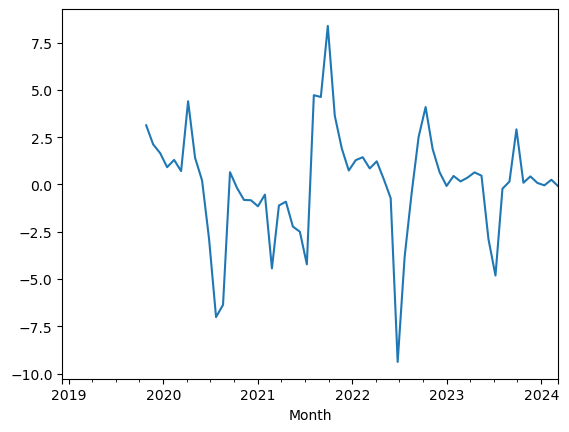

In [339]:
df['Seasonal First Difference'].plot()

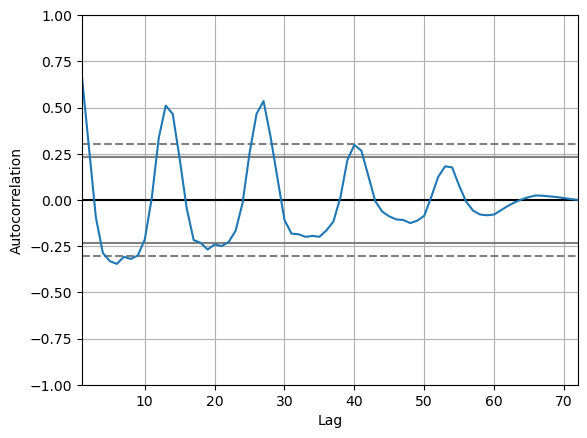

In [340]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Water Level'])
plt.show()

In [341]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

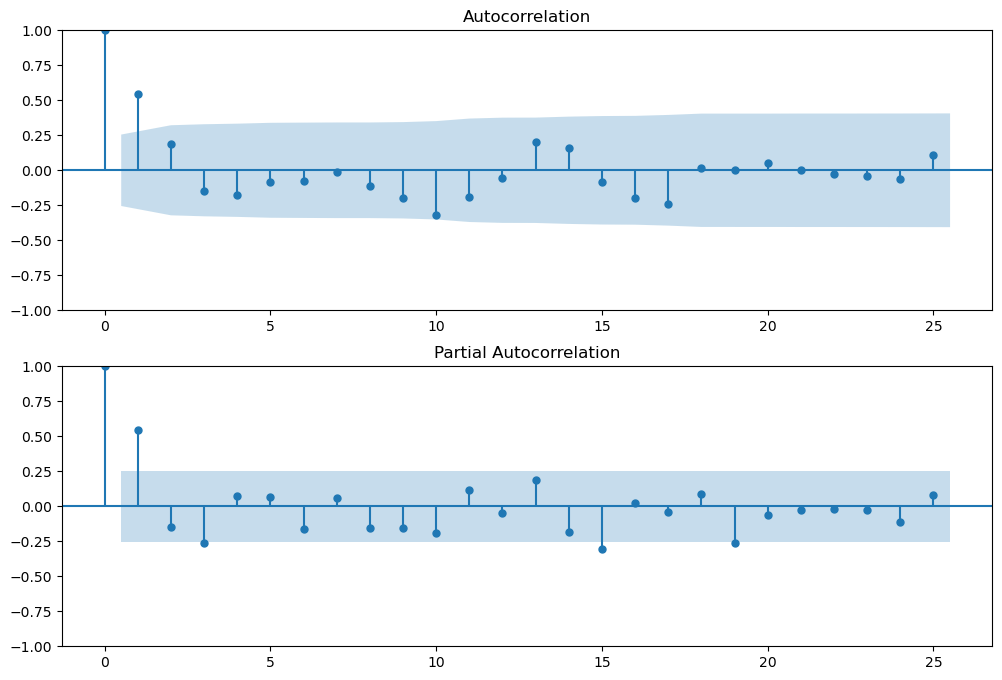

In [213]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=25,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=25,ax=ax2)

In [268]:
# For non-seasonal data
#p=4, d=1 , q= 2
from statsmodels.tsa.arima_model import ARIMA

In [342]:
model=sm.tsa.statespace.SARIMAX(df['Water Level'],order=(4, 1, 2),seasonal_order=(4,1,2,12))
results=model.fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 27D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 27D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarnin

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99919D+00    |proj g|=  3.22904D-01

At iterate    5    f=  1.84180D+00    |proj g|=  3.32781D-02

At iterate   10    f=  1.83827D+00    |proj g|=  9.66513D-03

At iterate   15    f=  1.83414D+00    |proj g|=  1.29690D-02

At iterate   20    f=  1.83391D+00    |proj g|=  1.17334D-03

At iterate   25    f=  1.83390D+00    |proj g|=  3.62943D-04

At iterate   30    f=  1.83389D+00    |proj g|=  7.25181D-04

At iterate   35    f=  1.83384D+00    |proj g|=  3.22284D-03

At iterate   40    f=  1.83379D+00    |proj g|=  1.09362D-03

At iterate   45    f=  1.83374D+00    |proj g|=  9.55489D-04


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.83372D+00    |proj g|=  9.31765D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     56      1     0     0   9.318D-04   1.834D+00
  F =   1.8337241851844182     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<Axes: xlabel='Month'>

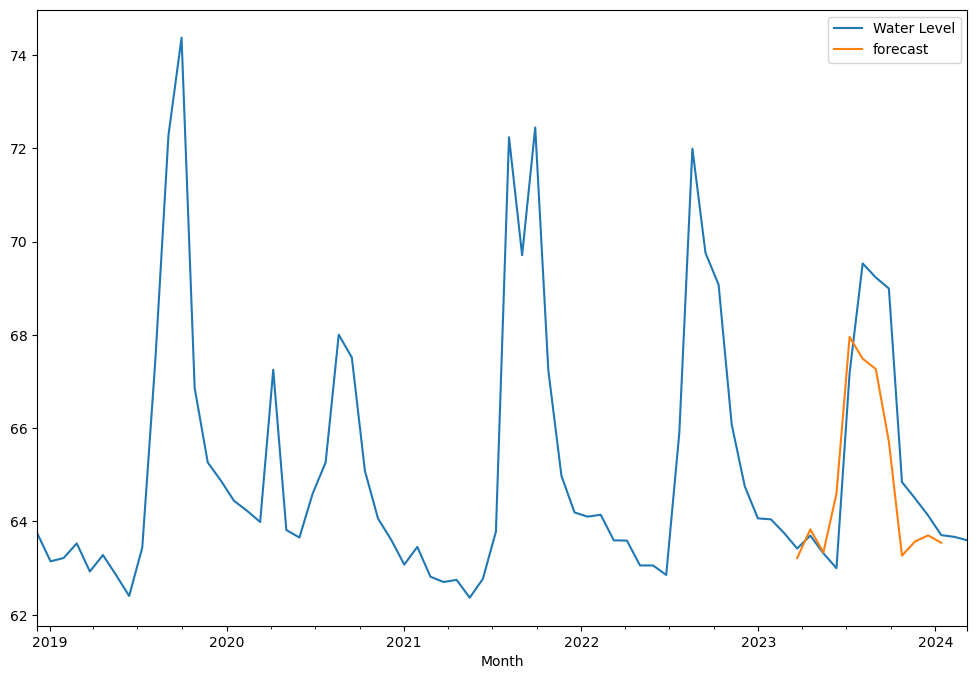

In [373]:
df['forecast']=results.predict(start=58,end=69,dynamic=True)
df[['Water Level','forecast']].plot(figsize=(12,8))

In [374]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,48)]

In [375]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [376]:
future_datest_df.tail()

,Water Level,Seasonal First Difference,forecast
2027-10-07,NaN,NaN,NaN
2027-11-07,NaN,NaN,NaN
2027-12-07,NaN,NaN,NaN
2028-01-07,NaN,NaN,NaN
2028-02-07,NaN,NaN,NaN


In [377]:

future_datest_df = future_datest_df.dropna(axis=1, how='all')
future_df = pd.concat([df, future_datest_df])

<Axes: >

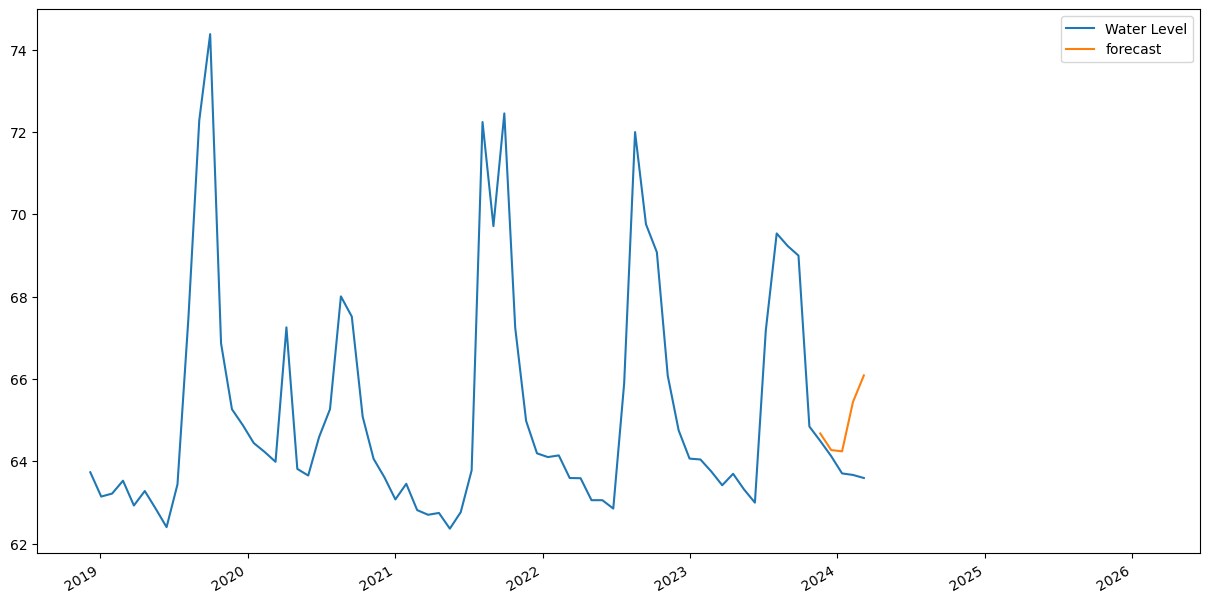

In [392]:
future_df['forecast'] = results.predict(start =67, end = 100, dynamic= True)  
future_df[['Water Level', 'forecast']].plot(figsize=(15,8 )) 

###### 

# 

# 